# Método de la secante
Método abierto

Representación gráfica del método de la secante. Esta técnica es similar a la del método de Newton-Raphson en el sentido de que una aproximación de la raíz se predice extrapolando una tangente de la función hasta el eje x. Sin embargo, el método de la secante usa una diferencia dividida en lugar de una derivada para estimar la pendiente.

![](img/secante01.png)

$$ x_{i+1} = x_i - \frac{f(x_i)(x_{i-1}-x_i) }{ f(x_{i-1})-f(x_i) } $$

Al sustituir:
$$x_a \leftarrow x_i \text{;actual}\\
x_b \leftarrow x_{i-1} \text{;anterior}$$
Obtenemos:
$$ x_{r} = x_a - \frac{f(x_a)(x_{b}-x_a) }{ f(x_{b})-f(x_a) } $$

In [1]:
function xr = f(x)
    xr = exp(-x)-x;
end

function xr = msec(xa, xb)
    xr = xa - ((f(xa) * (xb - xa)) / (f(xb) - f(xa)));
end

## Problema. 
Con el método de la secante calcule la raíz de $f(x) = e^{–x}–x$. Comience con los valores iniciales $x_{–1} = 0$ y $x_0 = 1.0$.
La raíz real es 0.56714329...

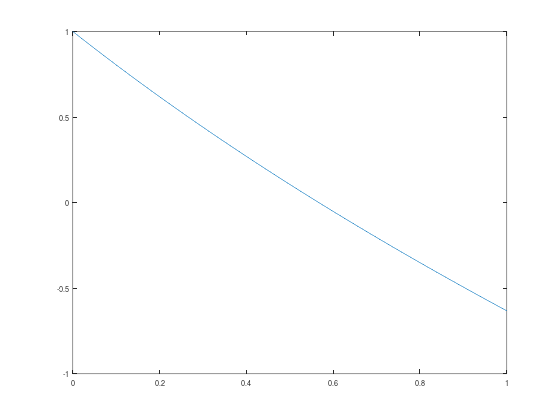

In [2]:
x = linspace(0,1);
y = f(x);
plot(x,y);

In [3]:
xb = 0;
xa = 1.0;

tol = 0.00001;
i = 0;
imax = 10;

while true
    x = msec(xa, xb);
%--imprimir datos en pantalla
    printf ("%d %f %f %f %f \n", i, xa, xb, x, f(x));
%--preparar siguiente iteracion
    xb = xa;
    xa = x;
    i = i + 1;
    
%-- condiciones de salida
    if i > imax
        disp("imax alcanzada");
        break;
    end
    if (f(x) == 0)
        disp("Solución");
        break;
    end
    if (abs(f(x)) <= tol)
        disp("Tolerancia");
        break;
    end
%    if (Et <= 0.01)
%        break;
%end
end

0 1.000000 0.000000 0.612700 -0.070814 
1 0.612700 1.000000 0.563838 0.005182 
2 0.563838 0.612700 0.567170 -0.000042 
3 0.567170 0.563838 0.567143 -0.000000 
Tolerancia


In [4]:

a = 0;
b = 1.0;

tol = 0.00001;
i = 0;
imax = 10

while true
    x = msec(a, b);
%--imprimir datos en pantalla
    printf ("%d %f %f %f %f \n", i, a, b, x, f(x));
%--preparar siguiente iteracion
   if (f(a) * f(x)) < 0
       b = x;
   else
       a = x;
   end
   
    i += 1;
    
%-- condiciones de salida
    if i > imax
        disp("imax alcanzada");
        break;
    end
    if (f(x) == 0)
        break;
    end
    if (abs(f(x)) <= tol)
        break;
    end
%    if (Et <= 0.01)
%        break;
%end
end

imax = 10
0 0.000000 1.000000 0.612700 -0.070814 
1 0.000000 0.612700 0.572181 -0.007888 
2 0.000000 0.572181 0.567703 -0.000877 
3 0.000000 0.567703 0.567206 -0.000098 
4 0.000000 0.567206 0.567150 -0.000011 
5 0.000000 0.567150 0.567144 -0.000001 


## Comparación con falsa posición

![](img/secante02.png)

Comparación entre los métodos de la falsa posición y de la secante. Las primeras iteraciones a) y b) de ambos métodos son idénticas. No obstante, en las segundas iteraciones c) y d), los puntos usados son diferentes. En consecuencia, el método de la secante llega a diverger, como se indica en d).

### Problema 
Utilice los métodos de la secante y de la falsa posición para calcular la raíz de $f(x) = ln x$. Empiece los cálculos con los valores iniciales $x_l = x_i –1 = 0.5$ y $x_u = x_i = 5.0$.